In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score, accuracy_score
import nltk

In [ ]:
try:
    df = pd.read_csv('/content/spam.csv', encoding='latin1')
except UnicodeDecodeError:
    try:
        df = pd.read_csv('/content/spam.csv', encoding='ISO-8859-1')
    except UnicodeDecodeError:
        df = pd.read_csv('/content/spam.csv', encoding='utf-8')

In [ ]:
print(df.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [ ]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
df.rename(columns={'v1': 'Class', 'v2': 'Text'}, inplace=True)

In [ ]:
df['numClass'] = df['Class'].map({'ham': 0, 'spam': 1})


In [ ]:
df['Count'] = df['Text'].apply(len)


In [ ]:
print(df.Class.unique())

['ham' 'spam']


In [ ]:
spam = df[df.numClass == 1]
ham = df[df.numClass == 0]

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stopset = stopwords.words("english") # Change stopset to a list
vectorizer = CountVectorizer(stop_words=stopset, binary=True)
X = vectorizer.fit_transform(df.Text)
y = df.numClass

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, train_size=0.80, random_state=None)

In [ ]:
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 4457 samples.
Testing set has 1115 samples.


In [ ]:
def train_classifier(clf, X_train, y_train):
    clf.fit(X_train, y_train)

In [ ]:
def predict_labels(clf, features):
    return clf.predict(features)

In [ ]:
F = LogisticRegression(random_state=0, max_iter=1000)
G = DecisionTreeClassifier(random_state=0)

In [ ]:
new_clf = [F, G]
new_objects = ['Logistic Regression', 'Decision Tree']
new_acc_score = [0, 0]

In [ ]:
for b in range(0, 2):
    print(new_objects[b])
    train_classifier(new_clf[b], X_train, y_train)
    y_pred_new = predict_labels(new_clf[b], X_test)
    pred_val_new = f1_score(y_test, y_pred_new)
    new_acc_score[b] = accuracy_score(y_test, y_pred_new)
    print("Accuracy in %:")
    print(new_acc_score[b] * 100)
    print("F1 Score")
    print(pred_val_new)
    print("\n")

Logistic Regression
Accuracy in %:
97.847533632287
F1 Score
0.9148936170212766


Decision Tree
Accuracy in %:
96.95067264573991
F1 Score
0.8835616438356164




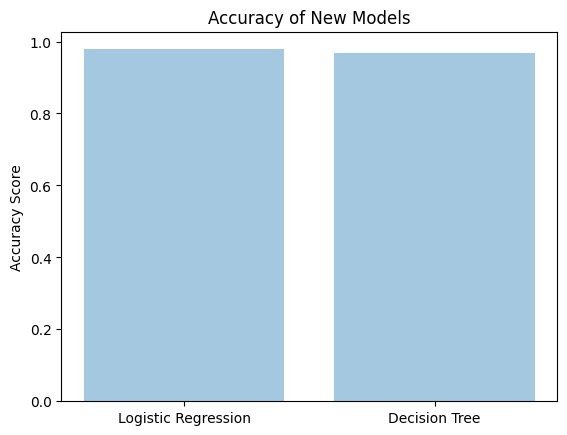

In [ ]:
new_y_pos = np.arange(len(new_objects))
new_y_val = [x for x in new_acc_score]
plt.bar(new_y_pos, new_y_val, align='center', alpha=0.4)
plt.xticks(new_y_pos, new_objects)
plt.ylabel('Accuracy Score')
plt.title('Accuracy of New Models')
plt.show()

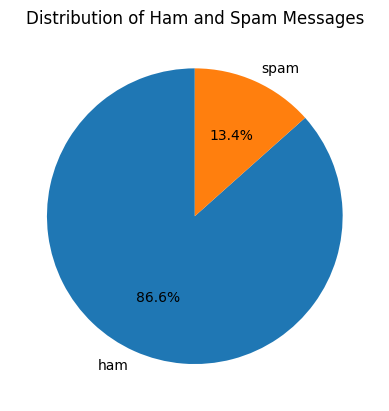

In [ ]:
class_counts = df['Class'].value_counts()
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Ham and Spam Messages')
plt.show()


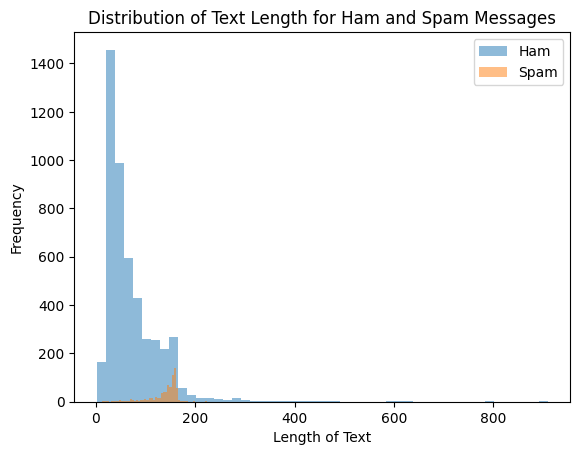

In [ ]:
plt.hist(ham['Count'], bins=50, alpha=0.5, label='Ham')
plt.hist(spam['Count'], bins=50, alpha=0.5, label='Spam')
plt.legend(loc='upper right')
plt.xlabel('Length of Text')
plt.ylabel('Frequency')
plt.title('Distribution of Text Length for Ham and Spam Messages')
plt.show()
